<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW5_Q1%2C2%2C3_99210301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIP**

**HW5**

---

*Ali Safarpoor Dehkordi*

*99210301*

---

---

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.signal as sig

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

#read file

In [ ]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip

--2022-07-10 11:20:45--  https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5lg0yrs1k7ydmb/HW5.zip [following]
--2022-07-10 11:20:45--  https://www.dropbox.com/s/raw/l5lg0yrs1k7ydmb/HW5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e97e7ab8e97dd7362ed68878f.dl.dropboxusercontent.com/cd/0/inline/Boz0cepZ5TskhjY57EycOrMXVKqsOOaVIuDrxEGnkoVyi257HlmpyamAto6rXKfmFAyCdUpRZVmAdYbeX2D18irdgGkGCmNTvmaWqVCgRAt0n9eo8VmAm_5jjYaVcx924pz7yOIH7ypZ8QhfBM-V39RM_t6VfEHP8_kh3b22pZHf0A/file# [following]
--2022-07-10 11:20:46--  https://uc1e97e7ab8e97dd7362ed68878f.dl.dropboxusercontent.com/cd/0/inline/Boz0cepZ5TskhjY57EycOrMXVKqsOOaVIuDrxEGnkoVyi257HlmpyamAto6rXKfmFAyCdUpRZVmAdYbeX2D

In [ ]:
import zipfile
zip = zipfile.ZipFile('HW5.zip')
zip.extractall()

In [ ]:
%cd HW5
!ls

/content/HW5
blood_cell.jpg	coins.jpg  images  old_video.mp4


# Q1

<p dir="rtl">
صرفا برای نمونه ، تصویر اضافه گردیده است:
</p>

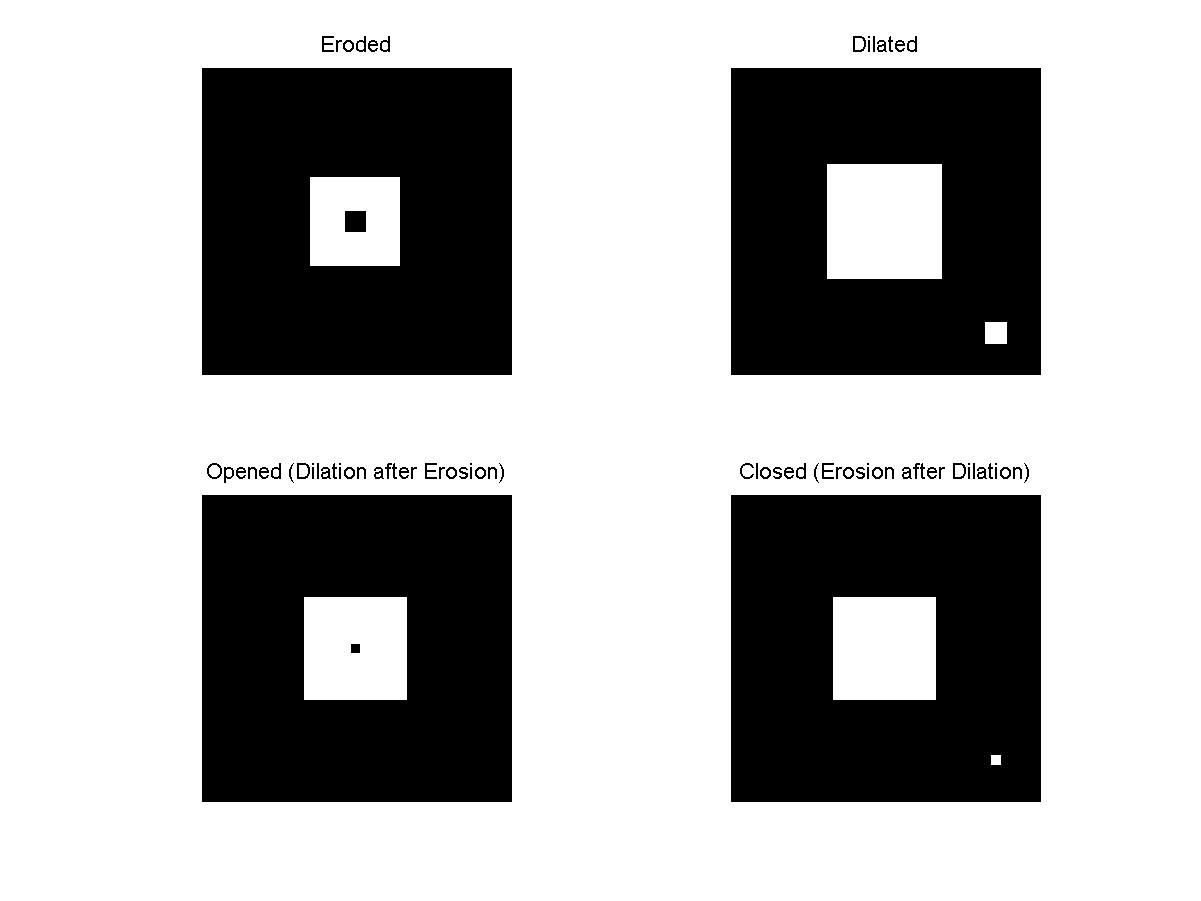

<p dir="rtl">
این نمونه ساده صرفا برای تست در زمان پیاده سازی استفاده شده است:

</p>

In [ ]:
ar = np.zeros((10,10))
ar[2,:] = 1
ar[:,5] = 1
ar [3:6,7:10] = 1
print(ar)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


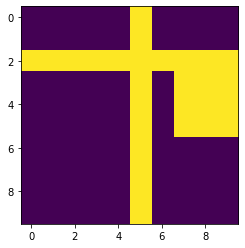

In [ ]:
imshow(ar)

**کلاس مربوطه با توابع مدنظر سوال اینجا تعریف شده است**
<p dir="rtl">

* برای ایجاد دسته بندی باینری تابع مربوطه تهیه شده است.
* برای اروژن و دیلیشن از یک کرنل استفاده نموده ایم که در شکل اصلی کانوالو می‌شود در مورد اروژن فقط نقاطی حداکثر مقدار را دارند حفظ میشوند و در دیلیشن فقط هر نقطه ای که مقداری یافته حفظ می‌شود که چنین چیزی معادل با همان منطق این دو عملیات است.
* دو تابع بازکردین و بستن نیز ترکیب دو تابع اروژن و دیلیشن هستند.
* در نهایت تابعی برای نمایش خروجی هریک از توابع گزارش شده است.

</p>

In [ ]:
class Q1:
    def __init__(self,k_size=3,th=0.5):
        self.th = th
        self.k_size = k_size

    def binarification(self,img):
        th = self.th
        img[img>th] = 1
        img[img<1] = 0
        return img
        
    def normalization(self,img):
        img = np.copy(img)
        shape_ = img.shape
        img = self.binarification(img)
        img = img.reshape(-1)
        img = (img-min(img))/(max(img)-min(img))
        return img.reshape(shape_)

    def dilation(self,img):
        k_size=self.k_size
        img = np.copy(img)
        img = self.normalization(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img>0]=1  
        img[img<0]=0  
        return img

    def erosion(self,img):
        k_size=self.k_size
        img = np.copy(img)
        img = self.normalization(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img<k_size**2]=0
        img[img>0]=1
        return img
    
    def opening(self,img):
        k_size=self.k_size
        img = np.copy(img)
        img = self.normalization(img)
        img = self.erosion(img)
        img = self.dilation(img)
        return img

    def closing(self,img):
        k_size=self.k_size
        img = np.copy(img)
        img = self.normalization(img)
        img = self.dilation(img)
        img = self.erosion(img)
        return img

    def show_all_function_outputs(self,img):
        
        out1 = self.dilation(img)        
        out2 = self.erosion(img)        
        out3 = self.closing(img)        
        out4 = self.opening(img)        

        fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
        ax0, ax00, ax1, ax2, ax3, ax4 = axes.flatten()
        ax0.imshow(img)
        ax0.set_title('original',fontsize=9)
        ax00.imshow(img)
        ax00.set_title('original',fontsize=9)
        ax1.imshow(out1)
        ax1.set_title('dilation',fontsize=9)
        ax2.imshow(out2)
        ax2.set_title('erosion',fontsize=9)
        ax3.imshow(out3)
        ax3.set_title('closing',fontsize=9)
        ax4.imshow(out4)
        ax4.set_title('opening',fontsize=9)

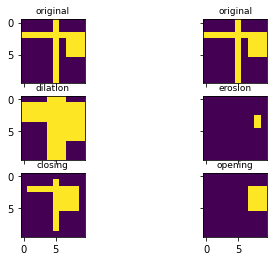

In [ ]:
q1 = Q1(th=0.5,k_size=3)
q1.show_all_function_outputs(ar)

<p dir="rtl">
در ادامه تصاویر مدنظر سوال خوانده شده اند و بهترین خروجی هر یک با تغییر مقادیر ترشولد و کرنل-سایز مورد جست و جو قرار گرفته است: 
</p>

In [ ]:
%cd images
!ls

/content/HW5/images
1.jpg  2.jpg  4.jpg  5.jpg  6.jpg


In [ ]:
filenames = [str(i)+'.jpg' for i in [1,2,4,5,6]]
filenames

['1.jpg', '2.jpg', '4.jpg', '5.jpg', '6.jpg']

<p dir="rtl">
نمایش اصل شکل‌ها
</p>

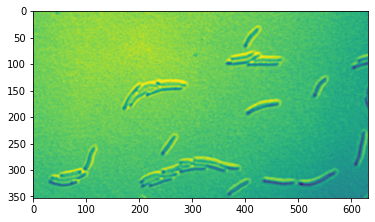

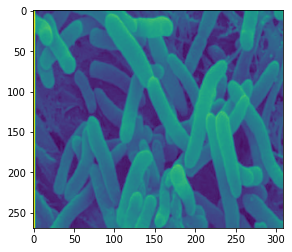

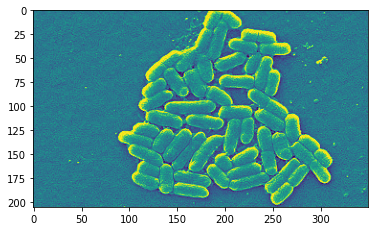

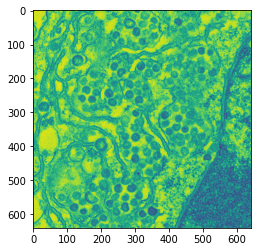

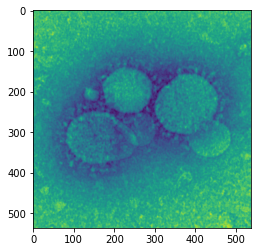

In [ ]:
for name in filenames:
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    imshow(img)
    plt.show()

<p dir="rtl">
در این نمونه بهترین خروجی مربوط به تابع بازکردن است.
</p>

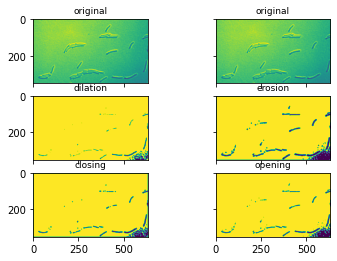

In [ ]:
name = filenames[0]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.5,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

<p dir="rtl">
به نظر میرسد در تست های مختلف بهترین نتیجه برای تابع بستن و تابع دیلیشن بوده است.
</p>

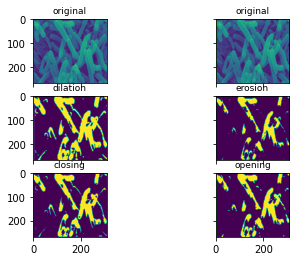

In [ ]:
name = filenames[1]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.5,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

<p dir="rtl">
در این مورد اروژن و بازکردن بهترین نتایج را داشته اند.
</p>

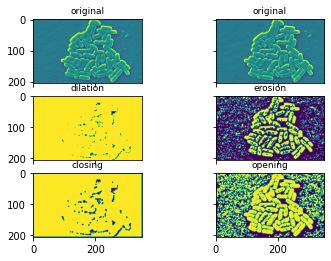

In [ ]:
name = filenames[2]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.35,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

<p dir="rtl">
یک نمونه از تغییر اعداد که پس زمینه توسط دیلیشن به خوبی دارای تفکیک شده است.
</p>

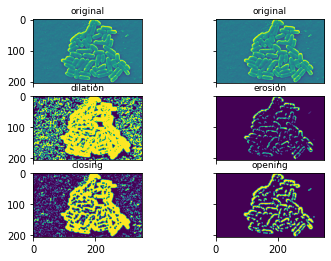

In [ ]:
name = filenames[2]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.5,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

<p dir="rtl">
بسته به هدف اگر اجزا ریز مدنظر باشند دیلیشن و کلوزینگ اما اوپنینگ با ترشولد زیاد بهترین تفکیک اجزا درشت را داشته است.
</p>

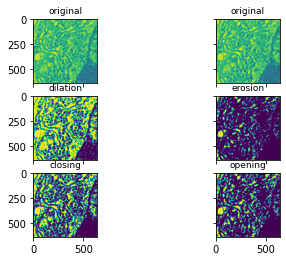

In [ ]:
name = filenames[3]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.75,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

<p dir="rtl">
تقریبا موفقیت همه به یک صورت بوده است در کل اروژن بهترین نتیجه رو به نظر داشته است.
</p>

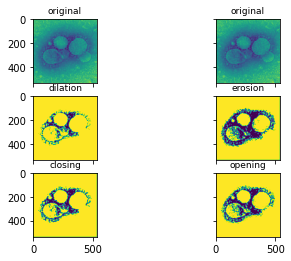

In [ ]:
name = filenames[4]
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)/256
q1 = Q1(th=0.3,k_size=3)
out = q1.normalization(img)
# imshow(out)
q1.show_all_function_outputs(img)

In [ ]:
%cd ..
!ls

/content/HW5
blood_cell.jpg	coins.jpg  images  old_video.mp4


#Q2

In [ ]:
!ls

blood_cell.jpg	coins.jpg  images  old_video.mp4


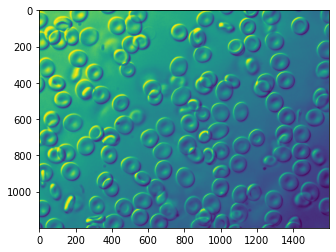

In [ ]:
name = 'blood_cell.jpg'
im = cv2.imread(name,cv2.IMREAD_GRAYSCALE)
# im = cv2.imread(name)
imshow(im)

In [ ]:
img = np.copy(im)
img = img/256.0
shape_ = img.shape
print(shape_)

(1200, 1600)


<p dir="rtl">
نمونه های مختلفی که تست شدند تا بهترین تفکیک پیدا شود.
</p>

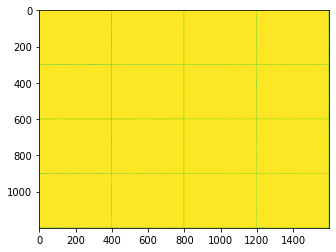

In [ ]:
img = np.copy(im[:])
img = img/256.0
for i in range(4):
    for j in range(4):
        subimg = img[i*300:i*300+299,j*400:j*400+399]
        th = np.mean(subimg)*0
        subimg[subimg<th]=0
        subimg[subimg>0]=1
        img[i*300:i*300+299,j*400:j*400+399] = 1-subimg
imshow(1-img)

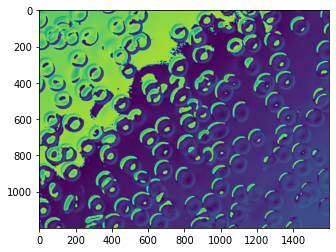

In [ ]:
img = np.copy(im[:])
img = img/256.0
q = Q1(th=0.7,k_size=3)
a = q.dilation(img)-img
imshow(a*255)

<p dir="rtl">
در شکل زیر مرزها به خوبی استخراج شده است.
برای این هدف تصویر را ۱۶ قسمت نموده ایم و هر قسمت به صورت مجزا ترشولد محاسبه گردیده است که همان میانگین نقاط ان بخش است و سپس با محاسبه اختلاف دیلیشن و تصویر اصلی مرز‌ها پیدا شده اند.
</p>

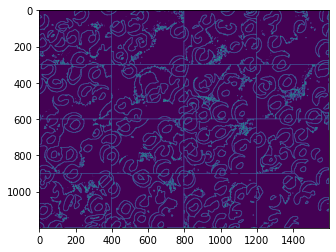

In [ ]:
img = np.copy(im[:])
img = img/256.0
q = Q1(th=0.7,k_size=3)
for i in range(4):
    for j in range(4):
        s = img[i*300:i*300+299,j*400:j*400+399]
        th = np.mean(s)
        s[s<th]=0
        s[s>0]=1
        # subimg = 1-subimg
        a = q.dilation(s)-s
        img[i*300:i*300+299,j*400:j*400+399] = a

img[img>0.5] = 1
img[img<1] = 0

# img = q.opening(img)

imshow(img*255)

In [ ]:
def dilation(img,k_size=3):
        img = np.copy(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img>0]=1  
        img[img<0]=0  
        return img

def erosion(img,k_size=3):
        img = np.copy(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img<k_size**2]=0
        img[img>0]=1
        return img

In [ ]:
img.shape

(1200, 1600)

<p dir="rtl">
حذف مرزهای ایجاد شده بین نواحی
</p>

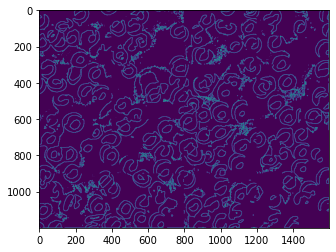

In [ ]:
img[299,:] = 0
img[599,:] = 0
img[899,:] = 0

img[:,399] = 0
img[:,799] = 0
img[:,1199] = 0

imshow(img*255)

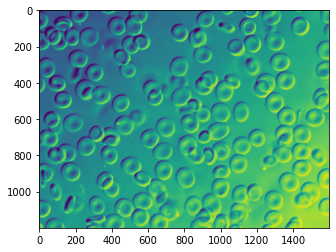

In [ ]:
imshow(im*255)

In [ ]:
original = np.copy(im[:])

In [ ]:
import random
from random import randint

In [ ]:
# imtb = im.transpose()
# a = np.array([imtb,100+imtb,imtb+100]).transpose()
# imshow(a)

<p dir="rtl">
به کمک تابع مخصوص دوایر هاف موجود در سی وی  ۲ تلاش شد دایره های تصویر اصلی استخراج گردند.
برای این منظور اعداد مختلفی تست شد و شعاع های در بازه مشخصی بهترین نتایج را داشته اند.
</p>

<p dir="rtl">
دوایر پیدا شده بر اساس شعاعشان به صورت رندم رنگ آمیزی شده اند.
</p>

100%|██████████| 141/141 [00:05<00:00, 26.44it/s]


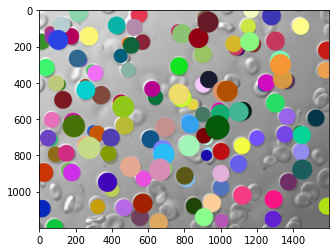

In [ ]:
# Convert to grayscale.
im = np.copy(original) 
gray = np.copy(im*255)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
			param2 = 30, minRadius = 20, maxRadius = 70)

# imt = im.transpose()
imt1 = np.copy(im)
imt2 = np.copy(im)
imt3 = np.copy(im)

# im = np.array([imt,imt,imt]).transpose()

# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	temparray = detected_circles[0, :]
	temparray = sorted(temparray, key=lambda x: x[2], reverse=False)
 
	for pt in tqdm(temparray):
		
		a, b, r = pt[0], pt[1], pt[2]
		
		# Draw the circumference of the circle.
		color = (randint(0,255),randint(0,255),randint(0,255))

		cv2.circle(imt1, (a,b), r , (color[0]), -1)
		cv2.circle(imt2, (a,b), r , (color[1]), -1)
		cv2.circle(imt3, (a,b), r , (color[2]), -1)

		im = np.array([imt1.transpose(),imt2.transpose(),imt3.transpose()]).transpose()
  
		# Draw a small circle (of radius 1) to show the center.
		imshow(im)
		

<p dir="rtl">
مشاهده مرکز نقاط برای راهبرد دوم
</p>

100%|██████████| 141/141 [00:01<00:00, 87.77it/s] 


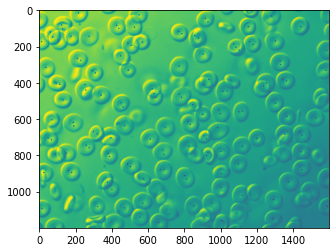

In [ ]:
im = np.copy(original) 
gray = np.copy(im*255)

# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	for pt in tqdm(detected_circles[0, :]):
		a, b, r = pt[0], pt[1], pt[2]

		# Draw a small circle (of radius 1) to show the center.
		cv2.circle(im, (a, b), 1, (0, 0, 255), 3)
		imshow(im)
		

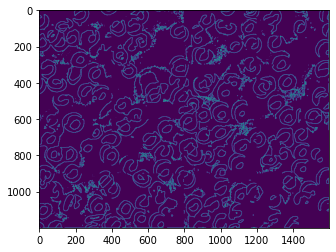

In [ ]:
imshow(img)

In [ ]:
import random
from random import randint

<p dir="rtl">
در ادامه از هر نقطه مرکز دایره تا بیشتر از شعاع آن شروع به دیلیشن مینماییم ولی هربار مرزها را از آن کم میکنیم تا از مرزها عبود نکنند و تا حدودی اشکال کشف شوند.
همچنین چالش این مورد وجود بریدگی در مرزها است که باعث شده خروجی ایدهآل حاصل نشود.
</p>

In [ ]:
out1 = np.zeros(img.shape)
out2 = np.zeros(img.shape)
out3 = np.zeros(img.shape)

img2 = img[:]
img2[img2<=0]=0
img2[img2>0]=100

k_size = 3
kernel = np.ones((k_size,k_size))

for pt in tqdm(detected_circles[0,:]):
        page = np.zeros(img.shape)
        a, b, r = pt[0], pt[1], pt[2]
        page[b,a]=1
        for i in range(r+20):
            page = sig.convolve2d(page, kernel, mode="same")
            page -= img2
            page[page<=0]=0
            page[page>0]=1
        
        out1[page>0] = randint(0,255)
        out2[page>0] = randint(0,255)
        out3[page>0] = randint(0,255)
        

100%|██████████| 141/141 [15:42<00:00,  6.68s/it]


In [ ]:
out = np.array([out1.transpose(),out2.transpose(),out3.transpose()]).transpose()
im = np.copy(original) 
im3d = np.array([im.transpose(),im.transpose(),im.transpose()]).transpose()

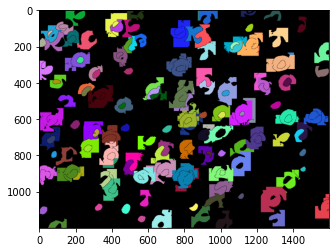

In [ ]:
imshow(out/255)

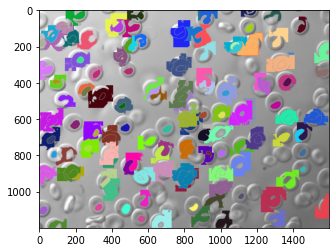

In [ ]:
im3d[out>0]=0
imshow(out/255+im3d/255)

<p dir="rtl">
در تلاش سوم استفاده از تشخیص کانتور‌ها در نظر گرفته شد که در تشخیص مرزها شرایط خوبی دارد اما باز هم به خاطر شکستگی مرزها از خروجی مطلوب فاصله دارد.
</p>

In [ ]:
a = np.copy(img[:])

In [ ]:
ret, thresh = cv2.threshold(a, a.max()-90 , 255, 0)
t = cv2.convertScaleAbs(thresh)
contours, hierarchy = cv2.findContours(t, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

283


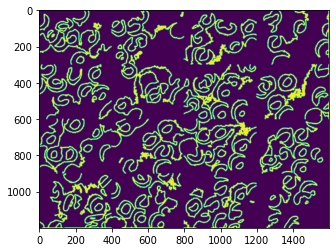

In [ ]:
lst = []
for c in contours:
    area = cv2.contourArea(c)
    if area > 80:
        lst.append(c)
print(len(lst))
raw = np.zeros(img.shape)
raw = cv2.drawContours(raw, lst, -1, (255), 5)
imshow(raw)

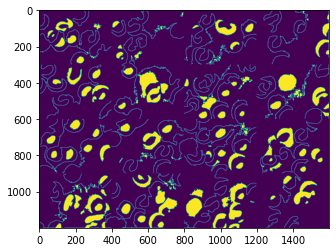

In [ ]:
raw = np.zeros(img.shape)
for i in lst:
    raw = cv2.drawContours(raw, [i], -1, (255), -1)
imshow(raw)

#Q3

In [ ]:
!ls

blood_cell.jpg	coins.jpg  images  old_video.mp4


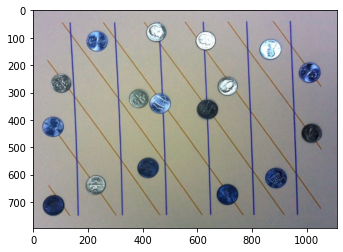

In [ ]:
name = 'coins.jpg'
original = cv2.imread(name)
imshow(original)

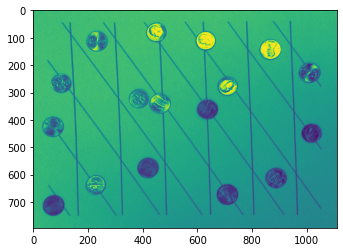

In [ ]:
img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
imshow(img)

## part A,B

In [ ]:
import math

<p dir="rtl">
یک تابع برای هدف سوال تعریف گردید که در قسمت پایین قابل مشاهده است.
در این سوال خود کد کامنت گذاری شده است:
</p>

In [ ]:
def HoughLinesDetector(img, threshold):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in tqdm(range(len(x_idxs))):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = int(round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len)
            accumulator[rho, t_idx] += 1

    lines = []
    for i in tqdm(range(2 * diag_len)):
        for j in range(num_thetas):
            if accumulator[i, j] >= threshold:
                lines.append([i-diag_len, thetas[j]  ])
            
    return lines
    

coins_myImp = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# Apply Canny edge detection method on the image 
edges = cv2.Canny(coins_myImp, 50, 150, apertureSize = 3)

# Output: vector of (roh, theta)
# theta: radian
lines = HoughLinesDetector(edges, 200)
if lines is not None:
        for i in tqdm(range(0, len(lines))):
            rho = lines[i][0]
            theta = lines[i][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(coins_myImp, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

100%|██████████| 74/74 [00:00<00:00, 5866.38it/s]


## part c

In [ ]:
coins_opencv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Canny edge detection method on the image 
edges = cv2.Canny(coins_opencv, 50, 150, apertureSize = 3)

# This returns an array of r and theta values 
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(coins_opencv, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

نمونه خروجی:

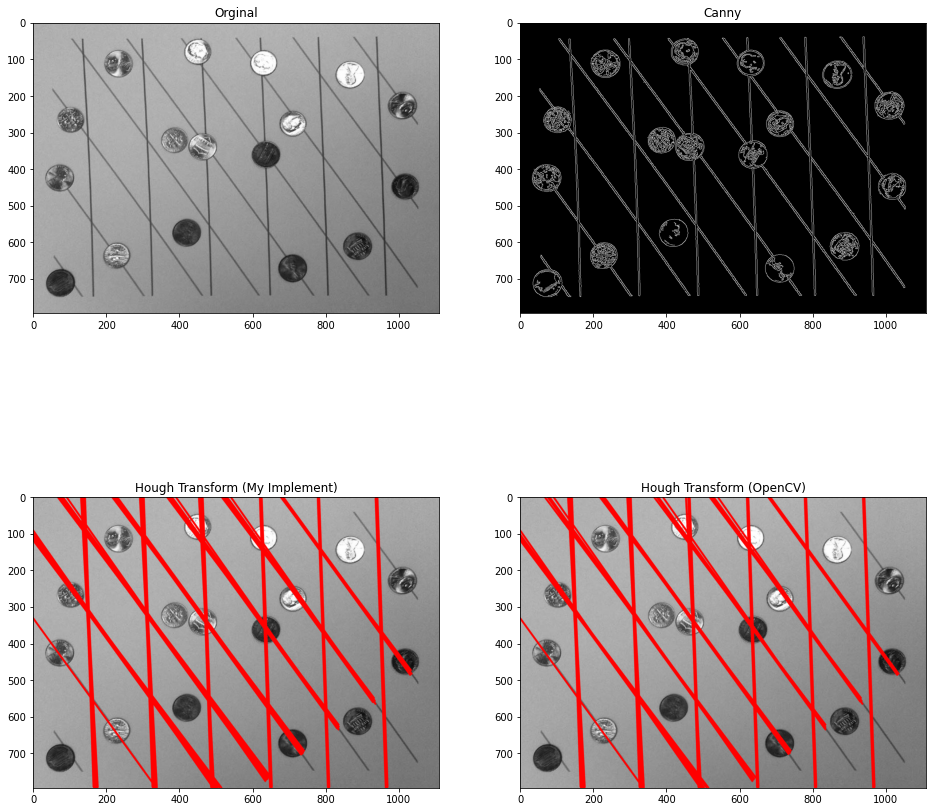

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orginal')

plt.subplot(222)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title('Canny')

plt.subplot(223)
plt.imshow(cv2.cvtColor(coins_myImp, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform (My Implement)')

plt.subplot(224)
plt.imshow(cv2.cvtColor(coins_opencv, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform (OpenCV)')

plt.show()
